Abstract:

The purpose of this assignment was to begin the introduction to data preprocessing as a preparation step for machine learning and deep learning. This assignment utilized images from UCI respository as sample datasets that will be used to train a machine learning model. Images that were processed represented three fruits spanish pear, fuji apple, watermelon. The data for these images were processed using the OpenCV python library. The main goals for this assignment were to process the data for each respective images into their appropriate feature space and feature vector, analyze thess datasets to see if there were any imbalance, explore if any standardization was needed, and export these data into appropriate .csv format to be used as training datasets for machine learning.  

##### Environment was installed by going to the anaconda website and downloading anaconda. Then anaconda was launched. In the environment tab, the create button was pressed in order to create the new working environment. Subsequently, pip was used to install a list of python libraries. 

In [1]:
import cv2 as cv
import sys
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import glob

In [2]:
glob.glob('../data/*.jpg')

['../data/spanish_pear_001.jpg',
 '../data/fuji_apple_001.jpg',
 '../data/watermelon_001.jpg']

Three images were choosen from UCI data repository. Each of these images respresent a fuji apple, spanish pear,
and watermelon respectively. These images were chosen due to the nature of their color as apple was a bright red color, spanish pear was a bright yellow, and watermelon was green. Intuitively, the human eyes was able to distinguish the differences betweent these colors easily. In correlation, computer vision should be able to distinguish the same differences due to its difference in RGB value. Subsequently, these images also have consistent dimensions which makes scaling and resizing of images more consistent.  


In [11]:
img_apple = cv.imread("../data/fuji_apple_001.jpg")
img_pear = cv.imread("../data/spanish_pear_001.jpg")
img_watermelon = cv.imread("../data/watermelon_001.jpg")

# img_apple = cv.cvtColor(img_apple, cv.COLOR_BGR2RGB)
# img_pear = cv.cvtColor(img_pear, cv.COLOR_BGR2RGB)
# img_watermelon = cv.cvtColor(img_watermelon, cv.COLOR_BGR2RGB)

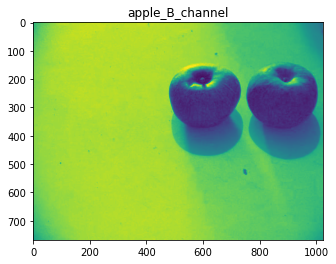

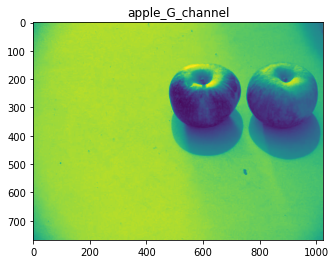

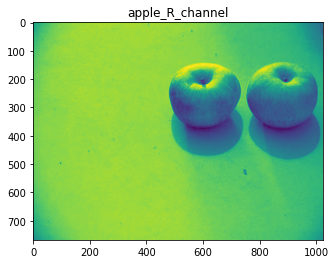

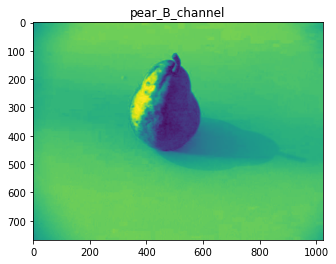

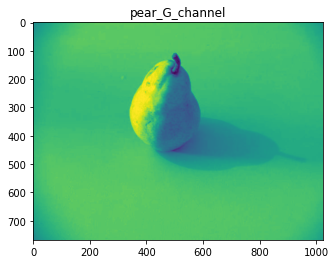

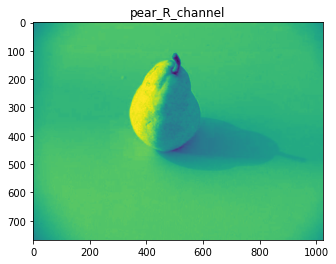

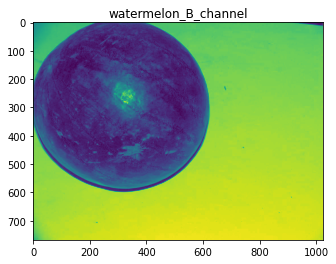

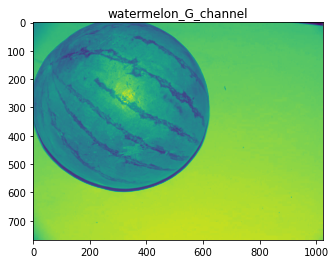

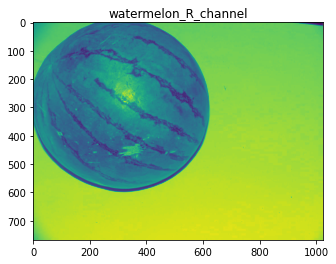

In [12]:
img_list = [img_apple, img_pear, img_watermelon]

title = ["apple","pear","watermelon"]

color_channel = ["B_channel", "G_channel", "R_channel"]

num = 0
for i in img_list:
    n = 0
    #split color channel of each image by B, G, R
    for j in cv.split(i):
        plt.figure()
        plt.imshow(j)
        plt.title(title[num]+"_"+color_channel[n])
        n = n+1
    num = num+1
        


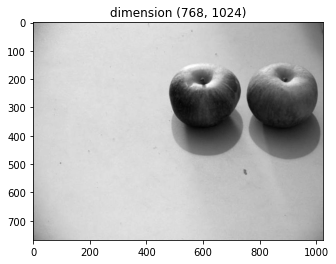

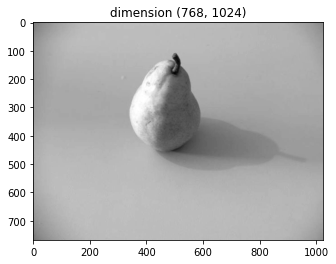

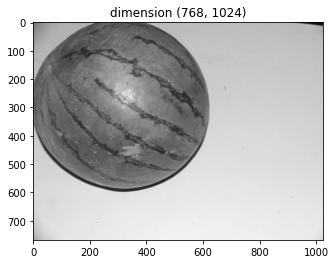

In [13]:
img_list_gray = []
for i in img_list:
    img = cv.cvtColor(i, cv.COLOR_BGR2GRAY)
    img_list_gray.append(img)
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.title("dimension {}".format(img.shape))

In [14]:
#helper function

#def get image from given directory relative path
def get_img(path:str):
    img_paths = glob.glob(path)
    return img_paths
#read image given a path
def read_img(path:str):
    img = cv.imread(path+'/*.jpg')
    return img
#resize image given image object and its width and height
def img_resize(width, height, img):
    dim = (width, height)
    resized = cv.resize(img, dim, interpolation = cv.INTER_AREA)
    return resized

#divide image into 8 by 8 blocks
def con_to_img_blocks(img):
    blocks = np.array([img[i:i+8, j:j+8] for j in range(0,344,8) for i in range(0,256,8)]) #iteratre over height and then width
    return blocks

#divide image into sliding blocks
def sliding_blocks(img):
    step = 5
    (w_height, w_width) = (8,8)
    slidingblocks = np.array([img[i:i+w_height, j:j+w_width] for j in range(0, img.shape[1]-w_width, step) for i in range(0,img.shape[0]-w_height, step)])
    return slidingblocks

#convert each feature of an image into a list of 64 values and add it dictionary with key:feature# and value:list of values of length 64
#return a dictionary of an image with each key as a feature of that image
def label_feature(img):
    block_dic = {}
    for i in range(len(img)):
        block_dic["feature vector {}".format(i)] = img[i].ravel()
    return block_dic

#convert a dictionary of an image into pandas dataframe
def to_dataframe(img_dic):
    df = pd.DataFrame(img_dic).T
    return df

#generate csv given list of dataframe
def to_csv(df_list):
    for i in range(len(df_list)):
        if (i==0):
            s='img_0'
        elif (i==1):
            s="img_1"
        else:
            s="img_2"
        temp_df = to_dataframe(df_list[i])
        temp_df.to_csv("sliding_img_csvs/"+"{}.csv".format(s))
    

In [15]:
gray_imgresize = []

for i in img_list_gray:
    temp_img = img_resize(344, 256, i)
    gray_imgresize.append(temp_img)
    

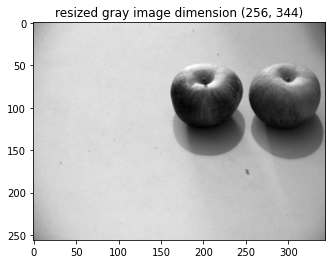

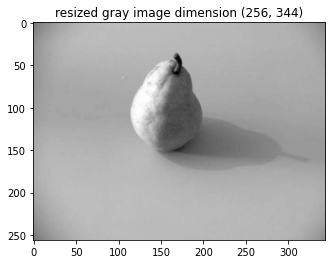

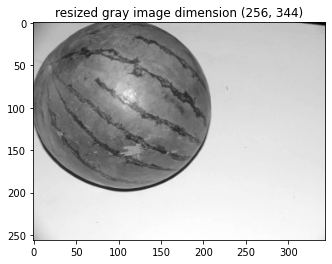

In [16]:
for i in gray_imgresize:
    plt.figure()
    plt.imshow(i, cmap='gray')
    plt.title("resized gray image dimension {}".format(i.shape))

In [17]:
#convert each image into blocks of 8X8 and store them in a list 
img_blocks = []
for i in gray_imgresize:
    img_blocks.append(con_to_img_blocks(i))

In [18]:
#convert to dictionary of feature value for each image and store all image in a list
img_feature_list = []
for i in img_blocks:
    img_feature_list.append(label_feature(i))

In [23]:
img_0 = pd.read_csv('../data/img_csvs/img_0.csv',index_col=0)
img_1 = pd.read_csv('../data/img_csvs/img_1.csv',index_col=0)
img_2 = pd.read_csv('../data/img_csvs/img_2.csv',index_col=0)
img_0['img'] = 'img_0'
img_1['img'] = 'img_1'
img_2['img'] = 'img_2'

In [25]:
img_0_1 = pd.concat([img_0,img_1]).sample(frac=1)
img_0_1_2 = pd.concat([img_0,img_1,img_2]).sample(frac=1)

In [32]:
img_0_1.to_csv('../data/combined_non_sliding/img_0_1.csv')
img_0_1_2.to_csv('../data/combined_non_sliding/img_0_1_2.csv')

In [20]:
#view all arrays of an image
np.set_printoptions(threshold=np.inf)


In [33]:
#convert each feature of size 64 vectirs into csv
for i in range(len(img_feature_list)):
    if (i==0):
        s='img_0'
    elif (i==1):
        s="img_1"
    else:
        s="img_2"
    temp_df = to_dataframe(img_feature_list[i])
    temp_df.to_csv("img_csvs/"+"{}.csv".format(s))
    
    
    
    

In [23]:
#convert each image into sliding blocks of 8X8 and store them in a list each index of list contains all blocks of each image 
sliding_block_list = [sliding_blocks(i)for i in gray_imgresize]


#convert to dictionary of feature value for each image in sliding block and store all image in a list
sliding_img_feature_list = [label_feature(i) for i in sliding_block_list]

In [35]:
#convert each feature of size 64 vectirs into csv for the sliding blocks
for i in range(len(sliding_img_feature_list)):
    if (i==0):
        s='sliding_img_0'
    elif (i==1):
        s="sliding_img_1"
    else:
        s="sliding_img_2"
    temp_df = to_dataframe(sliding_img_feature_list[i])
    temp_df.to_csv("sliding_img_csvs/"+"{}.csv".format(s))
    

### Descriptive stats

In [26]:
import matplotlib.pyplot as plt
import plotly.express as px

In [27]:
for i in sliding_block_list:
    print(i.shape)

(3400, 8, 8)
(3400, 8, 8)
(3400, 8, 8)


    The dimension of the gray images were resized to height of 256 and width of 344. The purpose for these choosen dimensions was to keep its aspect ratio. Additionally, the resized height and width must also be divible by eight since this project divided the targeted image into sliding blocks of 8 by 8 height and width. The feature vector that was constructed from these images created 3400 feature vectors and each feature vector lies a 8 by 8 pixels who's value lies between 0-255 of the gray image scale. The features of each feature vector was then flatten to 64 features for each respective feature vector. 
    The mean of each feature lies between 189-190 for img_0 (apple), img_1 177-178 (pear), and img_2 148-151 (watermelon). This data does not need normalization as its mean feature values seem to correlate to the color of each fruit that belong to their respective image. For example, both the color for apple and pear are brighter than that of the color for watermelon, therefore, it should intuitively be true that the mean of each feature in the watermelon image should be lower than that of the brighter colored images. Subsequently, the standard deviation value of each image was normally distributet according to the histogram in figure #. This suggests that the data of feature value across all feature vectors was consistent and balanced, thus data transformation was not needed.    

In [28]:
#function to calculate mean, var, std of each feature for each immage, convert it to df for each image respectively and put them in dictionary
def get_stats_img(feature_list):    
    stat_dic_img = {}
    for i in range(len(feature_list)):
        temp_df = to_dataframe(feature_list[i])
        temp_df_mean = temp_df.mean().to_frame().reset_index()
        temp_df_std = temp_df.std().to_frame().iloc[:,0].values
        temp_df_var = temp_df.var().to_frame().iloc[:,0].values
        temp_df_mean['std'],temp_df_mean['var'] = [temp_df_std, temp_df_var]
        temp_df_mean.columns = ['features', 'mean', 'std', 'var']
        stat_dic_img['img_{}'.format(i)] = temp_df_mean
    return stat_dic_img
    

In [29]:
stat_dic_img = get_stats_img(sliding_img_feature_list)

In [32]:
stat_dic_img['img_2']

features        mean        std          var
0          0  148.895882  47.103927  2218.779977
1          1  148.960000  47.089302  2217.402342
2          2  148.925588  47.258157  2233.333384
3          3  148.915294  47.376180  2244.502384
4          4  149.128529  47.188607  2226.764587
..       ...         ...        ...          ...
59        59  150.950000  47.403774  2247.117829
60        60  150.912941  47.528633  2258.970942
61        61  150.998235  47.628842  2268.506616
62        62  150.999412  47.674382  2272.846719
63        63  151.190588  47.542058  2260.247278

[64 rows x 4 columns]

In [33]:
for i in stat_dic_img.keys():
    fig = px.histogram(stat_dic_img[i], x=stat_dic_img[i]['mean'], title="mean {}".format(str(i)))
    fig.show()

In [34]:
for i in stat_dic_img.keys():
    fig = px.histogram(stat_dic_img[i], x=stat_dic_img[i]['std'], title="std {}".format(str(i)))
    fig.show()

In [35]:
for i in stat_dic_img.keys():
    fig = px.scatter(stat_dic_img[i], x=stat_dic_img[i]['mean'], title="mean {}".format(str(i)))
    fig.show()

In [37]:
img_0 = pd.read_csv('../data/sliding_img_csvs/sliding_img_0.csv',index_col=0)
img_1 = pd.read_csv('../data/sliding_img_csvs/sliding_img_1.csv', index_col= 0)
img_2 = pd.read_csv('../data/sliding_img_csvs/sliding_img_2.csv', index_col=0)

In [52]:
img_2.head()

0    1    2    3    4    5    6    7    8    9  ...   55  \
feature vector 0  102  107  109  111  113  114  115  116  106  107  ...  125   
feature vector 1  112  114  115  119  120  122  123  125  110  116  ...  132   
feature vector 2  117  120  123  124  127  129  129  130  118  120  ...  139   
feature vector 3  124  127  128  130  132  134  135  136  125  128  ...  143   
feature vector 4  131  134  135  136  138  140  141  142  132  134  ...  148   

                   56   57   58   59   60   61   62   63    img  
feature vector 0  113  117  118  122  123  124  125  126  img_2  
feature vector 1  121  123  125  126  128  131  132  133  img_2  
feature vector 2  128  130  132  132  133  136  138  140  img_2  
feature vector 3  133  135  137  138  140  142  143  144  img_2  
feature vector 4  139  141  143  144  145  146  148  150  img_2  

[5 rows x 65 columns]

In [39]:
img_0['img'] = "img_0"
img_1['img'] = "img_1"
img_2['img'] = "img_2"

In [53]:
image01 = pd.concat([img_0, img_1]).sample(frac=1)
image012 = pd.concat([img_0,img_1,img_2]).sample(frac=1)

In [49]:
image01.to_csv('../data/combined_img_csvs/image01.csv')
image012.to_csv('../data/combined_img_csvs/image012.csv')

### combined feature space plotting

In [62]:
df_image01 = pd.read_csv('../data/combined_img_csvs/image01.csv')
df_image01 = df_image01.rename(columns={df_image01.columns[0]:'feature_vector'}) 
df_image012 = pd.read_csv('../data/combined_img_csvs/image012.csv')
df_image012.rename(columns={df_image012.columns[0]:'feature_vector'}) 

feature_vector    0    1    2    3    4    5    6    7    8  ...  \
0      feature vector 1604  221  220  222  218  219  220  220  219  222  ...   
1       feature vector 301  215  219  219  217  216  216  215  215  214  ...   
2      feature vector 3362  171  170  170  170  170  170  170  170  171  ...   
3      feature vector 1927   95   96   97  100  101  102  105  107   94  ...   
4      feature vector 2428  188  188  187  187  187  188  188  188  189  ...   
...                    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
10195  feature vector 2236  199  199  199  200  200  200  200  201  200  ...   
10196   feature vector 439  190  190  190  190  190  190  190  190  190  ...   
10197   feature vector 430  221  222  222  223  223  223  223  223  220  ...   
10198  feature vector 1076  222  220  219  221  221  221  222  222  221  ...   
10199  feature vector 1308  189  189  189  189  190  191  191  191  189  ...   

        55   56   57   58   59   60   61   62   63    img  
0      218  221  221  221  221  221  219  221  220  img_0  
1      221  217  217  214  215  217  216  217  220  img_0  
2      171  170  171  171  171  171  171  170  171  img_2  
3      106   96   99  100  101  102  104  106  107  img_1  
4      189  189  189  189  189  189  189  189  188  img_2  
...    ...  ...  ...  ...  ...  ...  ...  ...  ...    ...  
10195  199  199  198  197  200  199  198  199  200  img_0  
10196  191  190  190  190  191  191  191  191  191  img_2  
10197  222  219  219  219  223  223  222  221  222  img_0  
10198  218  220  218  218  220  221  221  220  221  img_0  
10199  189  189  189  189  189  189  189  189  189  img_1  

[10200 rows x 66 columns]

In [63]:
fig = px.scatter(df_image01, x='0', y='10', color='img', labels={'10':'feature 10', '0':'feature 1'})
fig.show()

In [64]:
fig = px.scatter_3d(df_image01, x='0', y='10', z='15', color='img', labels={'10':'feature 10', '0':'feature 1', '15':'feature 15'})
fig.show()

In [65]:
fig = px.scatter(df_image012, x='0', y='10', color='img', labels={'10':'feature 10', '0':'feature 1'})
fig.show()

In [67]:
fig = px.scatter_3d(df_image012, x='0', y='10', z='15', color='img', labels={'10':'feature 10', '0':'feature 1', '15':'feature 15'})
fig.show()

The 2-d feature space plot that showed observations for image0 and image1 indicated that each of their respective feature value was similar. One explaination for this could be that the intensity of their gray color channels were alike. Additionally, there were also some observations that fell out of the mean cluster of the plot. It could be interpreted that these observations represent the color of the different fruits, whereas the observations in the mean of the cluster represent the white spaces of the images. Similarly, when three features of image0 and image1 were selected, there were some observations that fell out the mean cluster, while most observations were within. This relationship supported the earlier analysis that was stated. 

In order to further understand this relationship, a feature space of three class label was plotted. The 2-d feature space plot for the three class labels of their three respective images showed a similar relationship to the two class label plots. The majority of observations within each class lied within the mean cluster as some observations lied outside the mean. Futhermore, this behavior was also observed in the 3-d three features plot where most observations lied within the mean cluster and some observations were outside the mean cluster. This indicated that the majority of the observations between each image had similar color on the gray color scale as the outliers could represent the color on the gray color scale that were indicative to the actual color of each fruits. Thus, further supporting the initial analysis.  